<h1><font color = green>FERTILIZER RECOMMENDATION</font></h1>

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

colorarr = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']

In [72]:
fert_data_path='../Data Raw/Fertilizer Prediction.csv'

<h1><font color = green>FERTILIZER DATA PREPROCESSING</font></h1>

<h1><font color = green>DATA VISUALIZATION</font></h1>

In [73]:
fert = pd.read_csv(fert_data_path)

In [74]:
fert.head()

,Temparature,Humidity,Moisture,Soil Type,Crop,N,K,P,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [75]:
fert.tail()

,Temparature,Humidity,Moisture,Soil Type,Crop,N,K,P,Fertilizer Name
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP
98,29,58,57,Black,Sugarcane,12,0,10,20-20


In [76]:
fert.size

891

In [77]:
fert.shape

(99, 9)

In [78]:
fert['Crop'].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [79]:
fert['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [80]:
fert.dtypes

Temparature         int64
Humidity            int64
Moisture            int64
Soil Type          object
Crop               object
N                   int64
K                   int64
P                   int64
Fertilizer Name    object
dtype: object

In [81]:
fert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop             99 non-null     object
 5   N                99 non-null     int64 
 6   K                99 non-null     int64 
 7   P                99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [82]:
fert.describe()

,Temparature,Humidity,Moisture,N,K,P
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


<h2><font color = green>GRAPHICAL REPRESENTATION OF DATA</font></h2>

In [83]:
def plot_cato(x):
    sns.set(rc = {'figure.figsize':(15,8)})
    sns.countplot(x = x,hue = fert['Fertilizer Name'],palette = "Set1")

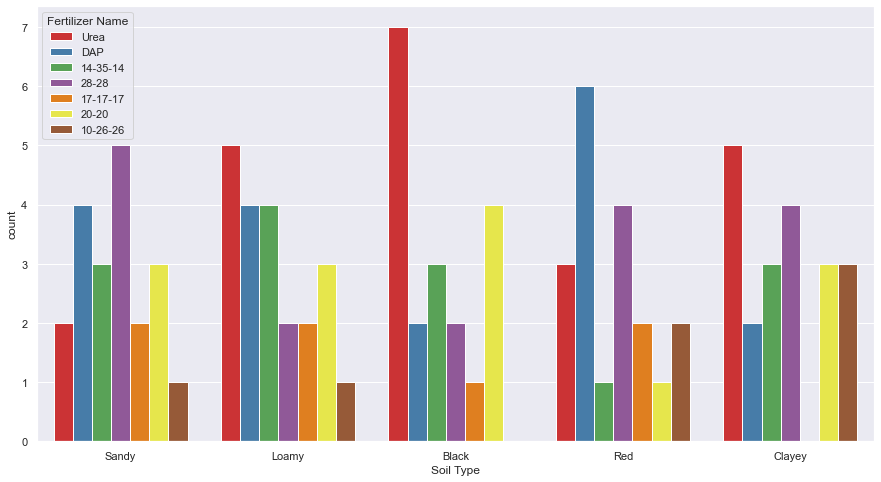

In [84]:
plot_cato(fert['Soil Type'])

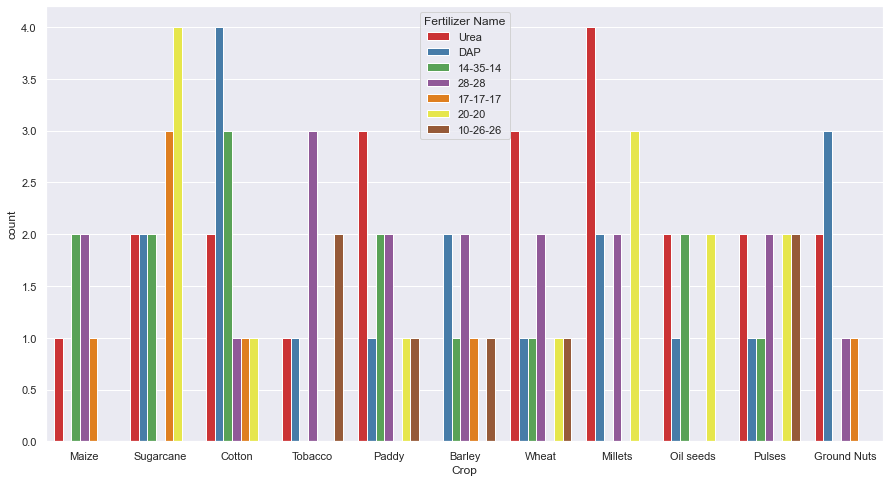

In [85]:
plot_cato(fert['Crop'])

<h1><font color = green>CORRELATION ANALYSIS</font></h1>

<h2><font color = green>CATEGORICAL DATA ENCODING</font></h2>

In [86]:
fert['Soil Type'] =fert['Soil Type'].astype('category').cat.codes
fert['Crop'] =fert['Crop'].astype('category').cat.codes
fert['Fertilizer Name'] =fert['Fertilizer Name'].astype('category').cat.codes

In [87]:
fert[fert.columns[0:]].corr()['Fertilizer Name'][:]

Temparature        0.045079
Humidity           0.008468
Moisture          -0.058222
Soil Type         -0.065404
Crop              -0.047543
N                  0.774628
K                 -0.824218
P                 -0.280311
Fertilizer Name    1.000000
Name: Fertilizer Name, dtype: float64

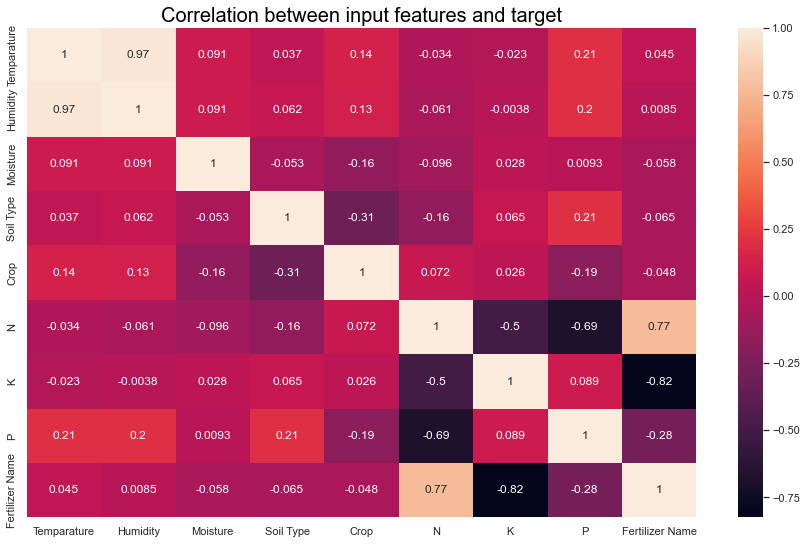

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(fert.corr(), annot=True)
plt.title('Correlation between input features and target', fontsize = 20, c='black')
plt.show()

<h2><font color = green>FEATURE AND TARGET SELECTION</font></h2>

<h2><font color = green>ENCODING</font></h2>

In [89]:
new_fert = pd.read_csv(fert_data_path)

In [90]:
new_fert

,Temparature,Humidity,Moisture,Soil Type,Crop,N,K,P,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


In [91]:
soil=pd.get_dummies(new_fert["Soil Type"])
col_crop=pd.get_dummies(new_fert["Crop"])

In [92]:
soil

,Black,Clayey,Loamy,Red,Sandy
0,0,0,0,0,1
1,0,0,1,0,0
2,1,0,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0
...,...,...,...,...,...
94,0,1,0,0,0
95,0,0,0,1,0
96,0,0,1,0,0
97,0,0,0,0,1


In [93]:
col_crop

,Barley,Cotton,Ground Nuts,Maize,Millets,Oil seeds,Paddy,Pulses,Sugarcane,Tobacco,Wheat
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
94,0,0,0,0,0,0,0,1,0,0,0
95,0,0,0,0,0,0,0,0,0,1,0
96,0,0,0,0,0,0,0,0,0,0,1
97,0,0,0,0,1,0,0,0,0,0,0


In [94]:
new_fert.drop(['Soil Type','Crop'],axis='columns')

,Temparature,Humidity,Moisture,N,K,P,Fertilizer Name
0,26,52,38,37,0,0,Urea
1,29,52,45,12,0,36,DAP
2,34,65,62,7,9,30,14-35-14
3,32,62,34,22,0,20,28-28
4,28,54,46,35,0,0,Urea
...,...,...,...,...,...,...,...
94,25,50,32,24,0,19,28-28
95,30,60,27,4,17,17,10-26-26
96,38,72,51,39,0,0,Urea
97,36,60,43,15,0,41,DAP


In [95]:
new_fert["Black"]=soil["Black"].to_list()
new_fert["Clayey"]=soil["Clayey"].to_list()
new_fert["Loamy"]=soil["Loamy"].to_list()
new_fert["Red"]=soil["Red"].to_list()
new_fert["Sandy"]=soil["Sandy"].to_list()

In [96]:
new_fert["Maize"]=col_crop["Maize"].to_list()
new_fert["Sugarcane"]=col_crop["Sugarcane"].to_list()
new_fert["Cotton"]=col_crop["Cotton"].to_list()
new_fert["Tobacco"]=col_crop["Tobacco"].to_list()
new_fert["Paddy"]=col_crop["Paddy"].to_list()
new_fert["Barley"]=col_crop["Barley"].to_list()
new_fert["Wheat"]=col_crop["Wheat"].to_list()
new_fert["Millets"]=col_crop["Millets"].to_list()
new_fert["Oil seeds"]=col_crop["Oil seeds"].to_list()
new_fert["Pulses"]=col_crop["Pulses"].to_list()
new_fert["Ground Nuts"]=col_crop["Ground Nuts"].to_list()

In [97]:
new_fert

,Temparature,Humidity,Moisture,Soil Type,Crop,N,K,P,Fertilizer Name,Black,...,Sugarcane,Cotton,Tobacco,Paddy,Barley,Wheat,Millets,Oil seeds,Pulses,Ground Nuts
0,26,52,38,Sandy,Maize,37,0,0,Urea,0,...,0,0,0,0,0,0,0,0,0,0
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP,0,...,1,0,0,0,0,0,0,0,0,0
2,34,65,62,Black,Cotton,7,9,30,14-35-14,1,...,0,1,0,0,0,0,0,0,0,0
3,32,62,34,Red,Tobacco,22,0,20,28-28,0,...,0,0,1,0,0,0,0,0,0,0
4,28,54,46,Clayey,Paddy,35,0,0,Urea,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28,0,...,0,0,0,0,0,0,0,0,1,0
95,30,60,27,Red,Tobacco,4,17,17,10-26-26,0,...,0,0,1,0,0,0,0,0,0,0
96,38,72,51,Loamy,Wheat,39,0,0,Urea,0,...,0,0,0,0,0,1,0,0,0,0
97,36,60,43,Sandy,Millets,15,0,41,DAP,0,...,0,0,0,0,0,0,1,0,0,0


In [98]:
fert_inputs=new_fert[['Temparature','Humidity','Moisture','N','P','K','Black','Clayey','Loamy','Red','Sandy','Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts']]

In [99]:
fert_output=new_fert['Fertilizer Name']

In [100]:
fert_inputs

,Temparature,Humidity,Moisture,N,P,K,Black,Clayey,Loamy,Red,...,Sugarcane,Cotton,Tobacco,Paddy,Barley,Wheat,Millets,Oil seeds,Pulses,Ground Nuts
0,26,52,38,37,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,29,52,45,12,36,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,34,65,62,7,30,9,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,32,62,34,22,20,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,28,54,46,35,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,25,50,32,24,19,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
95,30,60,27,4,17,17,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
96,38,72,51,39,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
97,36,60,43,15,41,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [101]:
fert_output

0         Urea
1          DAP
2     14-35-14
3        28-28
4         Urea
        ...   
94       28-28
95    10-26-26
96        Urea
97         DAP
98       20-20
Name: Fertilizer Name, Length: 99, dtype: object

<h1><font color = green>BUILDING MODELS</font></h1>

<h1><font color = green>DATA SPLITTING</font></h1>

In [102]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report

In [103]:
from sklearn.linear_model import RidgeClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [104]:
xtrain,xtest,ytrain,ytest = train_test_split(fert_inputs,fert_output,test_size = 0.1,random_state =2)

In [105]:
xtrain

,Temparature,Humidity,Moisture,N,P,K,Black,Clayey,Loamy,Red,...,Sugarcane,Cotton,Tobacco,Paddy,Barley,Wheat,Millets,Oil seeds,Pulses,Ground Nuts
98,29,58,57,12,10,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
91,34,65,45,6,21,19,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
88,36,68,50,12,19,18,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
14,26,52,31,14,41,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
0,26,52,38,37,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,34,65,60,35,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
22,35,68,33,11,37,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
72,34,65,48,23,19,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
15,31,62,49,10,14,13,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


<h1><font color = green>TRAINING THE MODELS</font></h1>

In [106]:
models = []
models.append(('Ridge', RidgeClassifier()))
models.append(('SVR', svm.SVC()))
models.append(('SGDC', SGDClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=3)))
models.append(('GPC', GaussianProcessClassifier()))
models.append(('BaysNa', GaussianNB()))
models.append(('Tree', tree.DecisionTreeClassifier()))
models.append(('RandomForest',RandomForestClassifier()))

In [107]:
for name, model in models:
  ypred = model.fit(xtrain, ytrain).predict(xtest)

<h1><font color = green>EVALUATING MODELS</font></h1>

<h1><font color = green>PERFORMANCE EVALUATION</font></h1>

In [108]:
for name, model in models:
  print(name)
  print(classification_report(ytest,ypred))

Ridge
              precision    recall  f1-score   support

    14-35-14       1.00      1.00      1.00         2
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         2
         DAP       1.00      1.00      1.00         1
        Urea       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

SVR
              precision    recall  f1-score   support

    14-35-14       1.00      1.00      1.00         2
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         2
         DAP       1.00      1.00      1.00         1
        Urea       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

SGDC
       

In [109]:
results = []
names = []
for name, model in models:
  print(name)
  accuracy = metrics.accuracy_score(ytest, ypred)
  results.append(accuracy)
  names.append(name)
  print('Accuracy score: %.2f' % accuracy) 
  print('Training set score: {:.2f}'.format(model.score(xtrain, ytrain)))
  print('Test set score: {:.2f}'.format(model.score(xtest, ytest)))
  

Ridge
Accuracy score: 1.00
Training set score: 0.93
Test set score: 0.70
SVR
Accuracy score: 1.00
Training set score: 0.65
Test set score: 0.70
SGDC
Accuracy score: 1.00
Training set score: 0.89
Test set score: 1.00
KNN
Accuracy score: 1.00
Training set score: 0.98
Test set score: 1.00
GPC
Accuracy score: 1.00
Training set score: 1.00
Test set score: 1.00
BaysNa
Accuracy score: 1.00
Training set score: 0.99
Test set score: 0.70
Tree
Accuracy score: 1.00
Training set score: 1.00
Test set score: 1.00
RandomForest
Accuracy score: 1.00
Training set score: 1.00
Test set score: 1.00


In [110]:
for name, model in models:
  print(name)
  score = cross_val_score(model, fert_inputs, fert_output,cv=3)
  print(score)

Ridge
[0.66666667 0.63636364 0.54545455]
SVR
[0.60606061 0.57575758 0.45454545]
SGDC
[0.6969697  0.78787879 0.54545455]
KNN
[0.93939394 0.87878788 0.6969697 ]
GPC
[0.84848485 0.72727273 0.51515152]
BaysNa
[0.48484848 0.63636364 0.45454545]
Tree
[1.         0.96969697 0.90909091]
RandomForest
[1.         0.96969697 0.84848485]


In [111]:
fig=px.bar(x = results,y = names)
fig.update_layout(title_text="Accuracy Comparison",
                  xaxis_title="Accuracy",
                  yaxis_title="Algorithm",
                  plot_bgcolor='white',
                  font_size=16, 
                  font_color='black')
fig.show()

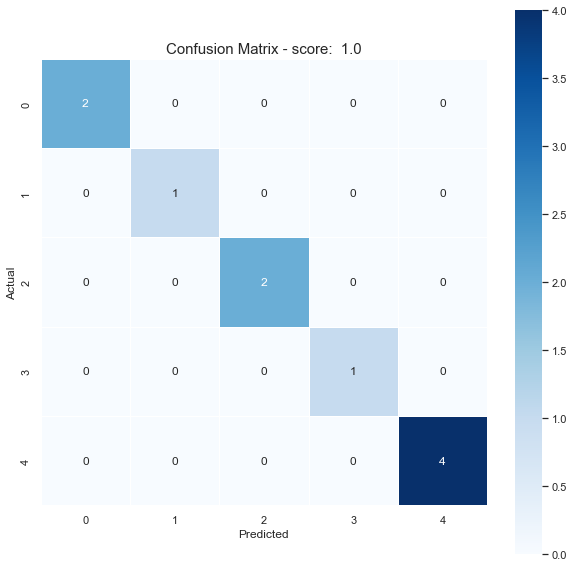

In [112]:
cm = confusion_matrix(ytest, ypred)

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual');
plt.xlabel('Predicted');
all_sample_title = 'Confusion Matrix - score:  '+str(accuracy_score(ytest,ypred))
plt.title(all_sample_title, size = 15);
plt.show()

<h1><font color = green>DEPLOYING MODEL</font></h1>

<h1><font color = green>GAUSSIAN PROCESS CLASSIFIER</font></h1>

In [117]:
GPC =  GaussianProcessClassifier()
GPC.fit(xtrain,ytrain)
predicted_values = GPC.predict(xtest)

In [123]:
r=open('input.txt','r')
w=open('output.txt','w+')
rl = r.readlines()
for x in rl:
    Temperature,Humidity,Moisture,N,P,K,Black,Clayey,Loamy,Red,Sandy,Maize,Sugarcane,Cotton,Tobacco,Paddy,Barley,Wheat,Millets,Oil_seeds,Pulses,Ground_Nuts = x.split(",")
    data = np.array([[Temperature,Humidity,Moisture,N,P,K,Black,Clayey,Loamy,Red,Sandy,Maize,Sugarcane,Cotton,Tobacco,Paddy,Barley,Wheat,Millets,Oil_seeds,Pulses,Ground_Nuts]])
    prediction = GPC.predict(data)
    prediction = str(prediction)
    w.write(prediction+"\n")
    print(prediction)
w.close()

['Urea']
['20-20']
['20-20']
